Patrick Marshall

Convolution and Enhancements with the Fast Fourier Transform

In [1]:
# Imports
import time
import numpy as np
from numpy.fft import fft2, ifft2
from scipy.signal import fftconvolve, convolve2d
import matplotlib.pyplot as plt
import pandas as pd

# Algorithms

In [2]:
# Direct Convolution Algorithm
def convolution2D(image, kernel):
    # Get dimensions of the image and kernel
    image_height, image_width = len(image), len(image[0])
    kernel_height, kernel_width = len(kernel), len(kernel[0])

    # Calculate the padding needed for valid convolution
    pad_height = kernel_height - 1 
    pad_width = kernel_width - 1

    # Pad the image with zeros
    padded_image = [[0] * (image_width + 2 * pad_width) for _ in range(image_height + 2 * pad_height)]
    for i in range(image_height):
        for j in range(image_width):
            padded_image[i + pad_height][j + pad_width] = image[i][j]      
        
    # Initialize output img
    output = [[0] * (image_width + 1 * pad_width) for _ in range(image_height + 1 * pad_height)]

    # Initialize the output feature map
    output_height = len(output)
    output_width = len(output[0])

    reversed_kernel = [row[::-1] for row in kernel]
    reversed_kernel.reverse()
    
    # Perform convolution
    for i in range(output_height):
        for j in range(output_width):
            # Apply the kernel
            for m in range(kernel_height):  # Reverse loop for rows
                for n in range(kernel_width):  # Reverse loop for columns
                    output[i][j] += padded_image[i + m][j + n] * reversed_kernel[m][n]
    
    return output

In [3]:
# FFT-Based Convolution Algorithm
def fft_convolve2d(image, kernel):
    image = np.array(image)
    kernel = np.array(kernel)
    # Get dimensions of the image and kernel
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Calculate the padding needed for valid convolution
    pad_height = kernel_height - 1
    pad_width = kernel_width - 1

    # Pad the image with zeros
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')

    # Pad the kernel to match the size of the padded image
    padded_kernel = np.pad(kernel, ((0, image_height - kernel_height), (0, image_width - kernel_width)), mode='constant')

    # Apply FFT to the padded image and kernel
    fft_image = fft2(padded_image)
    fft_kernel = fft2(padded_kernel, s=fft_image.shape)

    # Perform element-wise multiplication in frequency domain
    fft_result = fft_image * fft_kernel

    # Apply inverse FFT to get back to spatial domain
    convolved_result = np.real(ifft2(fft_result))

    # Crop the result to the original size of the image
    convolved_result = convolved_result[pad_height:, pad_width:]

    return convolved_result

# Benchmark

In [4]:
# Function to generate random image and kernel
def generate_random_data(height, width, min_val=1, max_val=50):
    return np.random.randint(min_val, max_val, size=(height, width))

In [5]:
# Function to measure execution time of a function
def measure_execution_time(func, *args):
    start_time = time.time()
    result = func(*args)
    end_time = time.time()
    return result, end_time - start_time

In [6]:
# Define image and kernel dimensions
image_sizes = [256, 512, 1024, 2048, 4096]
kernel_sizes = [3, 5, 7]

# Results storage
direct_conv_times = []
fft_conv_times = []
sc_dir = []
sc_fft = []

In [7]:
# Iterate over different kernel sizes
for image_height in image_sizes:
    image_width = image_height
    for kernel_height in kernel_sizes:
        kernel_width = kernel_height

        # Generate random image and kernel
        image = generate_random_data(image_height, image_width)
        kernel = generate_random_data(kernel_height, kernel_width)

        # Benchmarking direct convolution
        direct_conv_result, direct_conv_time = measure_execution_time(convolution2D, image, kernel)

        # Benchmarking FFT-based convolution
        fft_conv_result, fft_conv_time = measure_execution_time(fft_convolve2d, image, kernel)
        
        # Benchmarking scipy's Direct convolution
        scipy_direct_conv_result, scipy_direct_conv_time = measure_execution_time(convolve2d, image, kernel)

        # Benchmarking scipy's FFT convolution
        scipy_fft_conv_result, scipy_fft_conv_time = measure_execution_time(fftconvolve, image, kernel)

        # Append Results
        direct_conv_times.append(direct_conv_time)
        fft_conv_times.append(fft_conv_time)
        sc_dir.append(scipy_direct_conv_time)
        sc_fft.append(scipy_fft_conv_time)


In [8]:
size_3_kernel_direct = []
size_3_kernel_fft = []
size_3_sc_dir = []
size_3_sc_fft = []

size_5_kernel_direct = []
size_5_kernel_fft = []
size_5_sc_dir = []
size_5_sc_fft = []

size_7_kernel_direct = []
size_7_kernel_fft = []
size_7_sc_dir = []
size_7_sc_fft = []

for i in range(len(direct_conv_times)):
    if i % 3 == 0:
        size_3_kernel_direct.append(direct_conv_times[i])
        size_3_sc_dir.append(sc_dir[i])
    elif i % 3 == 1:
        size_5_kernel_direct.append(direct_conv_times[i])
        size_5_sc_dir.append(sc_dir[i])
    else:
        size_7_kernel_direct.append(direct_conv_times[i])
        size_7_sc_dir.append(sc_dir[i])
        
for i in range(len(fft_conv_times)):
    if i % 3 == 0:
        size_3_kernel_fft.append(fft_conv_times[i])
        size_3_sc_fft.append(sc_fft[i])
    elif i % 3 == 1:
        size_5_kernel_fft.append(fft_conv_times[i])
        size_5_sc_fft.append(sc_fft[i])
    else:
        size_7_kernel_fft.append(fft_conv_times[i]) 
        size_7_sc_fft.append(sc_fft[i])
        

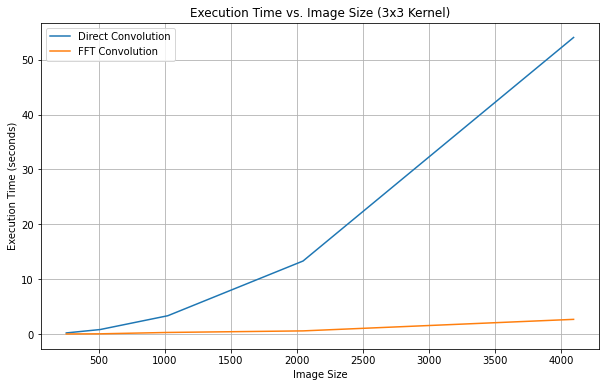

In [9]:
# Kernel Size 3 Plot
plt.figure(figsize=(10, 6))
plt.plot(image_sizes, size_3_kernel_direct, label='Direct Convolution')
plt.plot(image_sizes, size_3_kernel_fft, label='FFT Convolution')
plt.title('Execution Time vs. Image Size (3x3 Kernel)')
plt.xlabel('Image Size')
plt.ylabel('Execution Time (seconds)')
plt.legend()
plt.grid(True)
plt.show()

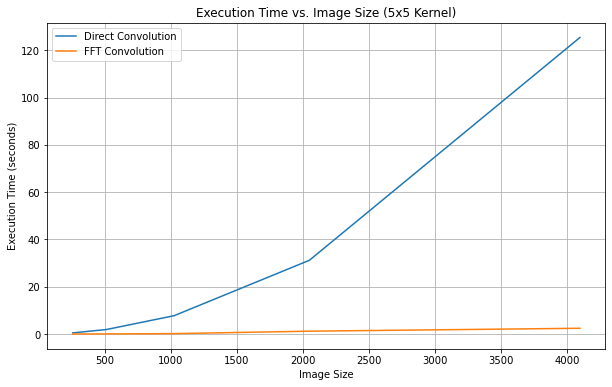

In [10]:
# Kernel Size 5 Plot
plt.figure(figsize=(10, 6))
plt.plot(image_sizes, size_5_kernel_direct, label='Direct Convolution')
plt.plot(image_sizes, size_5_kernel_fft, label='FFT Convolution')
plt.title('Execution Time vs. Image Size (5x5 Kernel)')
plt.xlabel('Image Size')
plt.ylabel('Execution Time (seconds)')
plt.legend()
plt.grid(True)
plt.show()

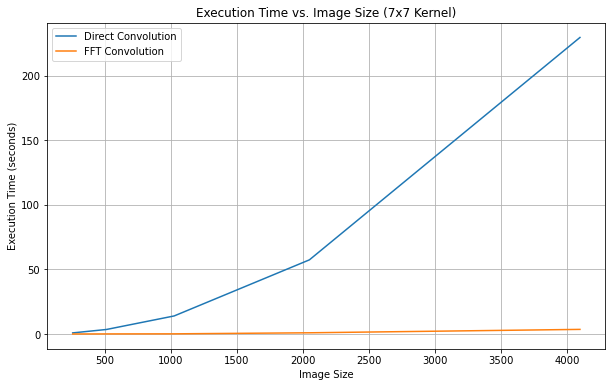

In [11]:
# Kernel Size 7 Plot
plt.figure(figsize=(10, 6))
plt.plot(image_sizes, size_7_kernel_direct, label='Direct Convolution')
plt.plot(image_sizes, size_7_kernel_fft, label='FFT Convolution')
plt.title('Execution Time vs. Image Size (7x7 Kernel)')
plt.xlabel('Image Size')
plt.ylabel('Execution Time (seconds)')
plt.legend()
plt.grid(True)
plt.show()

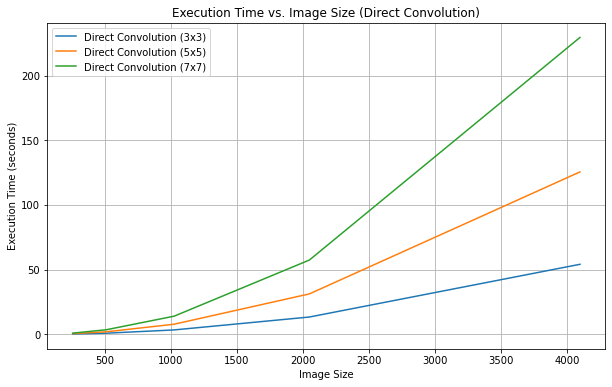

In [12]:
# All Direct Convolution
plt.figure(figsize=(10, 6))
plt.plot(image_sizes, size_3_kernel_direct, label='Direct Convolution (3x3)')
plt.plot(image_sizes, size_5_kernel_direct, label='Direct Convolution (5x5)')
plt.plot(image_sizes, size_7_kernel_direct, label='Direct Convolution (7x7)')
plt.title('Execution Time vs. Image Size (Direct Convolution)')
plt.xlabel('Image Size')
plt.ylabel('Execution Time (seconds)')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
data = {
    'Image Sizes': image_sizes,
    'Direct Convolution (3x3)': size_3_kernel_direct,
    'Direct Convolution (5x5)': size_5_kernel_direct,
    'Direct Convolution (7x7)': size_7_kernel_direct
}

dir_time_vs_img_size_df = pd.DataFrame(data)
dir_time_vs_img_size_df

,Image Sizes,Direct Convolution (3x3),Direct Convolution (5x5),Direct Convolution (7x7)
0,256,0.197922,0.457747,0.847550
1,512,0.815148,1.898382,3.496801
2,1024,3.330403,7.742652,13.956373
3,2048,13.308360,31.193717,57.366281
4,4096,54.060105,125.478329,229.429682


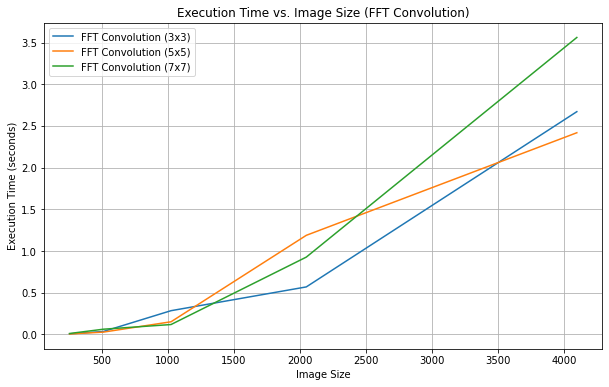

In [14]:
# All FFT Convolution
plt.figure(figsize=(10, 6))
plt.plot(image_sizes, size_3_kernel_fft, label='FFT Convolution (3x3)')
plt.plot(image_sizes, size_5_kernel_fft, label='FFT Convolution (5x5)')
plt.plot(image_sizes, size_7_kernel_fft, label='FFT Convolution (7x7)')
plt.title('Execution Time vs. Image Size (FFT Convolution)')
plt.xlabel('Image Size')
plt.ylabel('Execution Time (seconds)')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
data = {
    'Image Sizes': image_sizes,
    'FFT Convolution (3x3)': size_3_kernel_fft,
    'FFT Convolution (5x5)': size_5_kernel_fft,
    'FFT Convolution (7x7)': size_7_kernel_fft
}

fft_time_vs_img_size_df = pd.DataFrame(data)
fft_time_vs_img_size_df

,Image Sizes,FFT Convolution (3x3),FFT Convolution (5x5),FFT Convolution (7x7)
0,256,0.006928,0.005268,0.011049
1,512,0.035081,0.027525,0.062466
2,1024,0.284495,0.151426,0.118453
3,2048,0.569564,1.188143,0.926983
4,4096,2.670992,2.418314,3.560707


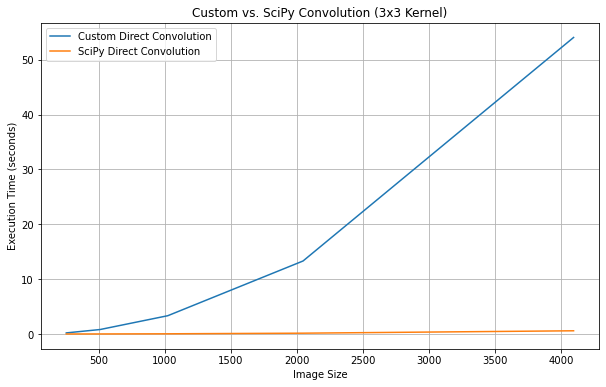

In [16]:
# Custom Direct Convolution vs SciPy (3x3)
plt.figure(figsize=(10, 6))
plt.plot(image_sizes, size_3_kernel_direct, label='Custom Direct Convolution')
plt.plot(image_sizes, size_3_sc_dir, label='SciPy Direct Convolution')
plt.title('Custom vs. SciPy Convolution (3x3 Kernel)')
plt.xlabel('Image Size')
plt.ylabel('Execution Time (seconds)')
plt.legend()
plt.grid(True)
plt.show()

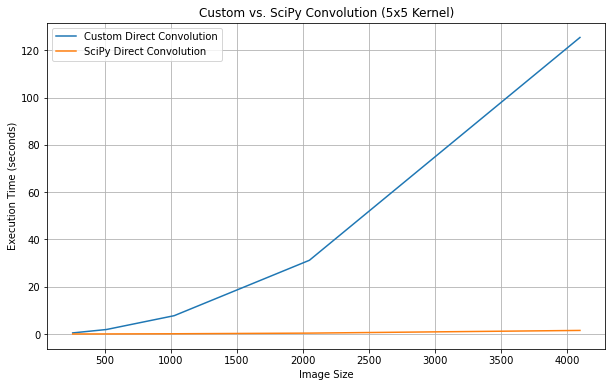

In [17]:
# Custom Direct Convolution vs SciPy (5x5)
plt.figure(figsize=(10, 6))
plt.plot(image_sizes, size_5_kernel_direct, label='Custom Direct Convolution')
plt.plot(image_sizes, size_5_sc_dir, label='SciPy Direct Convolution')
plt.title('Custom vs. SciPy Convolution (5x5 Kernel)')
plt.xlabel('Image Size')
plt.ylabel('Execution Time (seconds)')
plt.legend()
plt.grid(True)
plt.show()

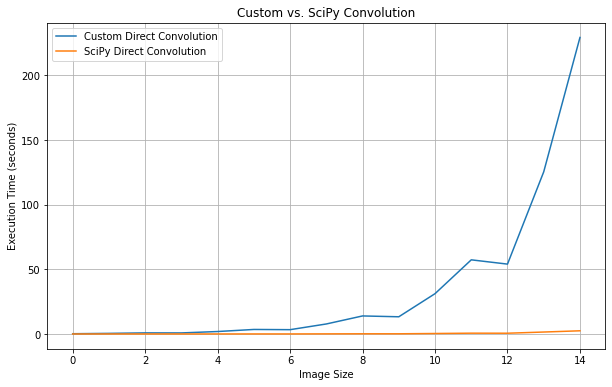

In [18]:
# Custom Direct Convolution vs SciPy
plt.figure(figsize=(10, 6))
plt.plot(direct_conv_times, label='Custom Direct Convolution')
plt.plot(sc_dir, label='SciPy Direct Convolution')
plt.title('Custom vs. SciPy Convolution')
plt.xlabel('Image Size')
plt.ylabel('Iteration')
plt.legend()
plt.grid(True)
plt.show()

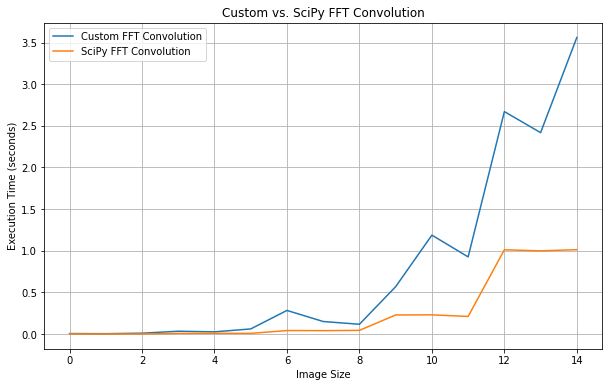

In [19]:
# Custom FFT Convolution vs SciPy
plt.figure(figsize=(10, 6))
plt.plot(fft_conv_times, label='Custom FFT Convolution')
plt.plot(sc_fft, label='SciPy FFT Convolution')
plt.title('Custom vs. SciPy FFT Convolution')
plt.xlabel('Image Size')
plt.ylabel('Iteration')
plt.legend()
plt.grid(True)
plt.show()